In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 9

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

from jupyterthemes import jtplot
jtplot.style(theme='onedork')

In [2]:
bac_df = pd.read_csv('../data/order_book/BAC_24_04.csv', index_col=[0], parse_dates=True)
bac_df

,Bid,Ask,Last,Volume,Type
Time,,,,,
2023-04-24 13:58:43.114,29.74,29.74,29.74,162.0,Buy
2023-04-24 13:58:43.167,29.73,29.74,29.74,503.0,Buy
2023-04-24 13:58:43.167,29.73,29.74,29.74,197.0,Buy
2023-04-24 13:58:43.567,29.73,29.74,29.74,200.0,Buy
2023-04-24 13:58:44.873,29.73,29.74,29.74,2000.0,Buy
...,...,...,...,...,...
2023-04-24 14:02:34.435,29.69,29.70,29.69,530.0,Sell
2023-04-24 14:02:42.038,29.69,29.70,29.70,100.0,Buy
2023-04-24 14:02:42.038,29.69,29.70,29.70,200.0,Buy


In [3]:
bk_df = pd.read_csv('../data/order_book/BK_24_04.csv', index_col=[0], parse_dates=True)
bk_df

,Bid,Ask,Last,Volume,Type
Time,,,,,
2023-04-24 13:46:02.843,44.02,44.03,44.03,100.0,Buy
2023-04-24 13:46:02.843,44.02,44.03,44.03,100.0,Buy
2023-04-24 13:46:04.876,44.01,44.02,44.02,100.0,Buy
2023-04-24 13:46:04.876,44.01,44.02,44.02,100.0,Buy
2023-04-24 13:46:04.876,44.01,44.02,44.02,100.0,Buy
...,...,...,...,...,...
2023-04-24 14:03:00.814,43.93,43.94,43.93,100.0,Sell
2023-04-24 14:03:01.235,43.93,43.94,43.93,100.0,Sell
2023-04-24 14:03:06.862,43.93,43.94,43.94,100.0,Buy


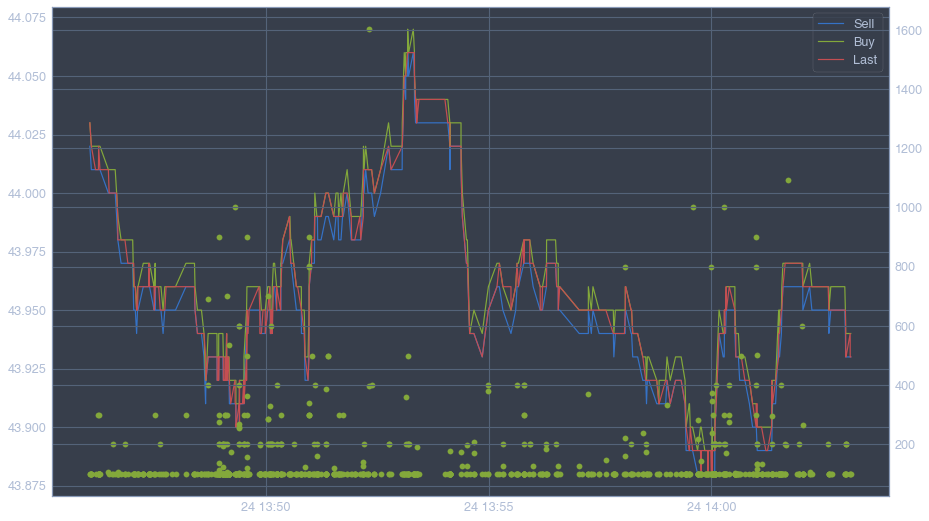

In [5]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(bk_df.index, bk_df['Bid'], label='Sell')
ax.plot(bk_df.index, bk_df['Ask'], label='Buy')
ax.plot(bk_df.index, bk_df['Last'], label='Last')
ax2.scatter(bk_df.index, bk_df['Volume'], label='Volume', c='g')
ax.grid(True)
ax.legend()

In [6]:
bk_df['Volume'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Volume,1000.0,140.965,127.969395,100.0,100.0,100.0,100.0,1602.0


In [7]:
bk_df.loc['2023-04-24 13:52:18.427'].iloc[1]

Bid         44.0
Ask        44.01
Last       44.01
Volume    1602.0
Type         Buy
Name: 2023-04-24 13:52:18.427000, dtype: object

In [8]:
bk_df[bk_df['Volume'] == 800]

,Bid,Ask,Last,Volume,Type
Time,,,,,
2023-04-24 13:50:58.133,43.94,43.95,43.94,800.0,Sell
2023-04-24 13:58:04.116,43.95,43.96,43.96,800.0,Buy
2023-04-24 14:00:00.032,43.88,43.89,43.88,800.0,Sell
2023-04-24 14:01:00.236,43.90,43.91,43.90,800.0,Sell


In [9]:
bk_df[bk_df['Volume'] == bk_df['Volume'].max()]

,Bid,Ask,Last,Volume,Type
Time,,,,,
2023-04-24 13:52:18.427,44.0,44.01,44.01,1602.0,Buy


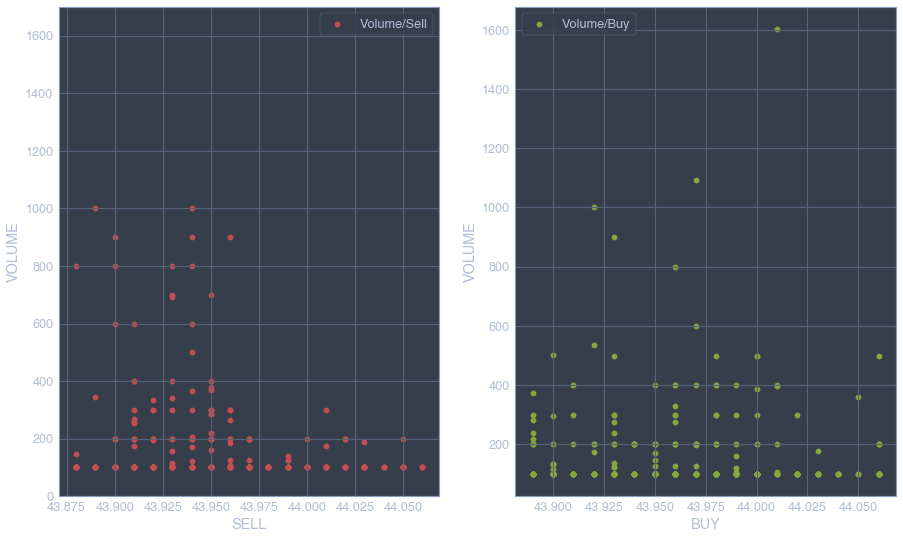

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))

ax1.scatter(bk_df[bk_df['Type'] == 'Sell']['Last'], bk_df[bk_df['Type'] == 'Sell']['Volume'], label='Volume/Sell', c='r')
ax1.set_ylim(0, 1700)
ax1.set_xlabel('SELL')
ax1.set_ylabel('VOLUME');
ax1.legend()

ax2.scatter(bk_df[bk_df['Type'] == 'Buy']['Last'], bk_df[bk_df['Type'] == 'Buy']['Volume'], label='Volume/Buy', c='g')
ax1.set_ylim(0, 1700)
ax2.set_xlabel('BUY')
ax2.set_ylabel('VOLUME');
ax2.legend()

(array([ 59.,  45., 102.,  79.,  86.,  61.,  18.,  31.,  14.,  16.]),
 array([43.89 , 43.907, 43.924, 43.941, 43.958, 43.975, 43.992, 44.009,
        44.026, 44.043, 44.06 ]),
 <BarContainer object of 10 artists>)

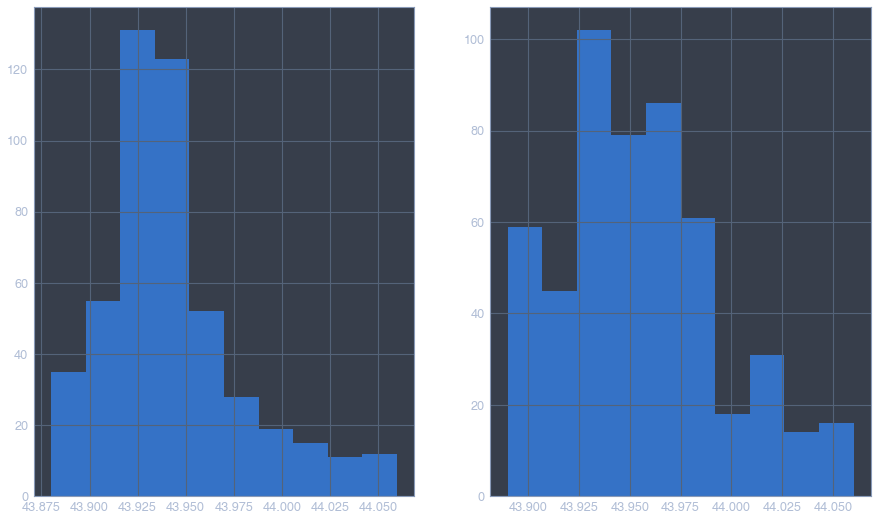

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))
sell = bk_df[bk_df['Type'] == 'Sell']['Last']
ax1.hist(sell)

buy = bk_df[bk_df['Type'] == 'Buy']['Last']
ax2.hist(buy)

(array([1., 1., 3., 1., 0., 0., 3., 5., 1., 1.]),
 array([43.88 , 43.888, 43.896, 43.904, 43.912, 43.92 , 43.928, 43.936,
        43.944, 43.952, 43.96 ]),
 <BarContainer object of 10 artists>)

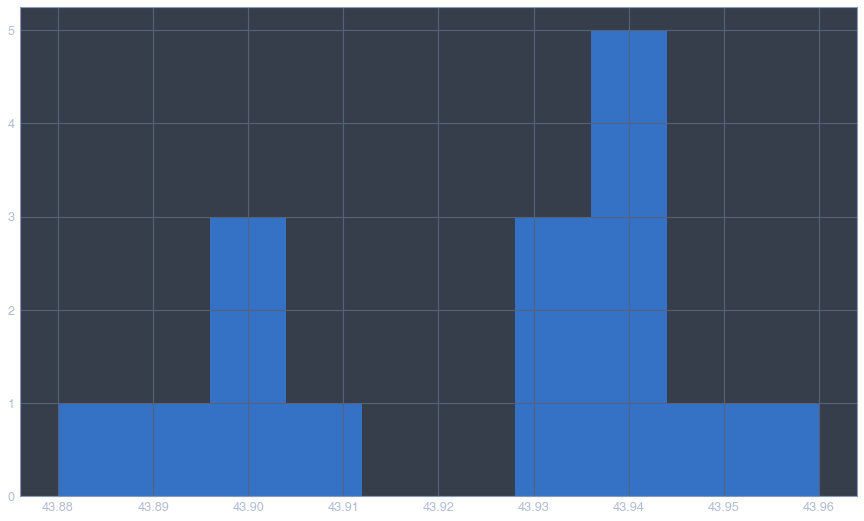

In [12]:
fig, ax = plt.subplots()
sell = bk_df[bk_df['Type'] == 'Sell'][bk_df[bk_df['Type'] == 'Sell']['Volume'] > 400]['Last']
ax.hist(sell)

In [13]:
bk_df[bk_df['Type'] == 'Sell'][bk_df[bk_df['Type'] == 'Sell']['Volume'] > 400]

,Bid,Ask,Last,Volume,Type
Time,,,,,
2023-04-24 13:48:42.141,43.93,43.94,43.93,691.0,Sell
2023-04-24 13:49:07.010,43.93,43.94,43.93,700.0,Sell
2023-04-24 13:49:24.389,43.91,43.92,43.90,600.0,Sell
2023-04-24 13:49:24.389,43.91,43.92,43.91,600.0,Sell
2023-04-24 13:49:33.934,43.94,43.95,43.94,900.0,Sell
2023-04-24 13:49:33.934,43.94,43.95,43.94,500.0,Sell
2023-04-24 13:50:02.394,43.95,43.96,43.95,700.0,Sell
2023-04-24 13:50:06.856,43.94,43.95,43.94,600.0,Sell
2023-04-24 13:50:58.133,43.94,43.95,43.93,801.0,Sell


In [14]:
bk_df[bk_df['Type'] == 'Buy'][bk_df[bk_df['Type'] == 'Buy']['Volume'] > 400]

,Bid,Ask,Last,Volume,Type
Time,,,,,
2023-04-24 13:48:56.350,43.92,43.93,43.93,900.0,Buy
2023-04-24 13:49:10.777,43.91,43.92,43.92,534.0,Buy
2023-04-24 13:49:18.217,43.91,43.92,43.92,1000.0,Buy
2023-04-24 13:51:01.688,43.97,43.98,43.98,500.0,Buy
2023-04-24 13:51:24.024,43.99,44.00,44.00,500.0,Buy
2023-04-24 13:51:24.024,43.99,44.00,44.00,500.0,Buy
2023-04-24 13:52:18.427,44.00,44.01,44.01,1602.0,Buy
2023-04-24 13:53:10.900,44.05,44.06,44.06,500.0,Buy
2023-04-24 13:58:04.116,43.95,43.96,43.96,800.0,Buy


In [15]:
last_mean = bk_df['Last'].rolling(window=50).mean().dropna()
last_std = bk_df['Last'].rolling(window=50).std().dropna()
last_std

Time
2023-04-24 13:47:04.068    0.022084
2023-04-24 13:47:04.068    0.022348
2023-04-24 13:47:05.835    0.022896
2023-04-24 13:47:07.052    0.023579
2023-04-24 13:47:07.052    0.024159
                             ...   
2023-04-24 14:03:00.814    0.010422
2023-04-24 14:03:01.235    0.010835
2023-04-24 14:03:06.862    0.011045
2023-04-24 14:03:06.862    0.011622
2023-04-24 14:03:07.628    0.012157
Name: Last, Length: 951, dtype: float64

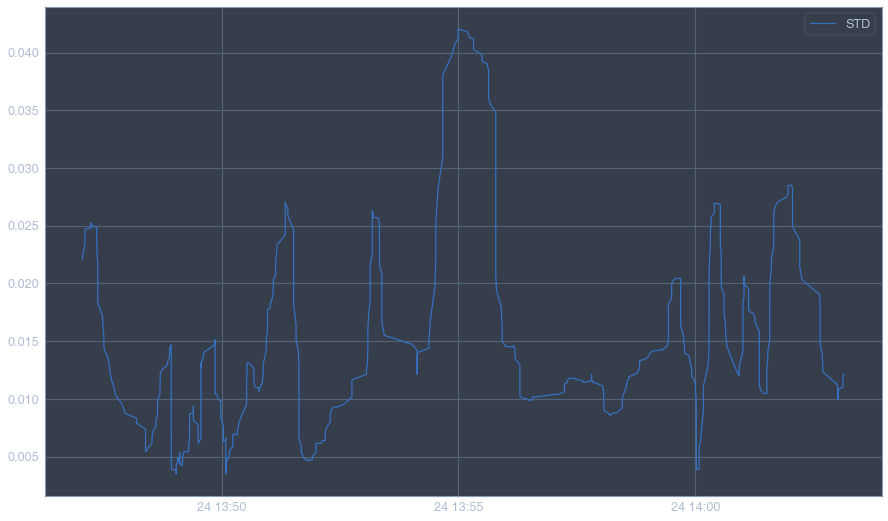

In [16]:
fig, ax = plt.subplots()
# ax.plot(bk_df.index, bk_df['Last'], label='Last', c='r')
# ax.plot(last_mean.index, last_mean, label='Mean', c='g')
ax.plot(last_std.index, last_std, label='STD')
ax.grid(True)
ax.legend()

In [17]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(bk_df['Last'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.519467
p-value                          0.110809
#Lags Used                       6.000000
Number of Observations Used    993.000000
Critical Value (1%)             -3.436953
Critical Value (5%)             -2.864455
Critical Value (10%)            -2.568322
dtype: float64


In [20]:
bk_log_scale = np.log(bk_df['Last'])
bk_log_scale.head()

Time
2023-04-24 13:46:02.843    3.784871
2023-04-24 13:46:02.843    3.784871
2023-04-24 13:46:04.876    3.784644
2023-04-24 13:46:04.876    3.784644
2023-04-24 13:46:04.876    3.784644
Name: Last, dtype: float64

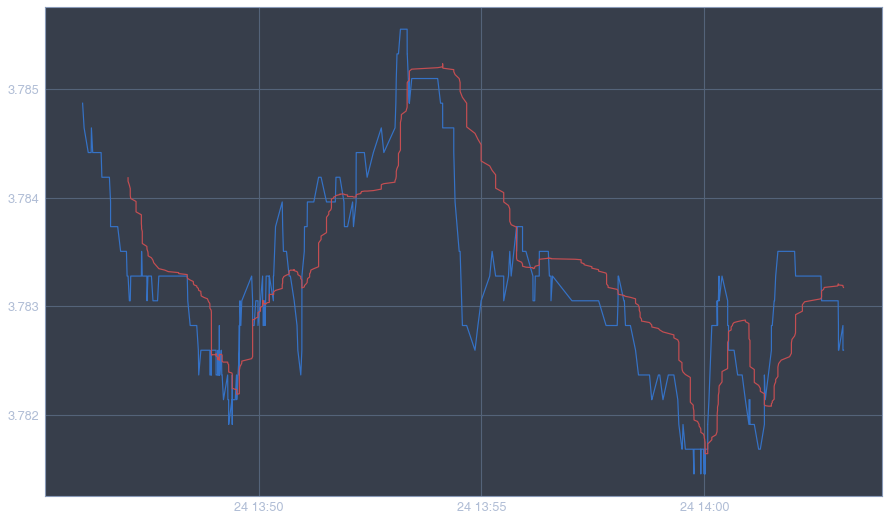

In [21]:
mov_average = bk_log_scale.rolling(window=50).mean()
mov_STD = bk_log_scale.rolling(window=50).std()
plt.plot(bk_log_scale)
plt.plot(mov_average, c='r')

In [22]:
dataset_bk_log_scale_minus_mov_average = bk_log_scale - mov_average

dataset_bk_log_scale_minus_mov_average.dropna(inplace=True)
dataset_bk_log_scale_minus_mov_average.head()

Time
2023-04-24 13:47:04.068   -0.000905
2023-04-24 13:47:04.068   -0.000873
2023-04-24 13:47:05.835   -0.001064
2023-04-24 13:47:07.052   -0.001032
2023-04-24 13:47:07.052   -0.001000
Name: Last, dtype: float64

In [58]:
def test_stationary(timeseries):
    ts_average = timeseries.rolling(window=50).mean()
    ts_STD = timeseries.rolling(window=50).std()
    
    orig = plt.plot(timeseries, c='b', label='Original')
    mean = plt.plot(ts_average, c='r', label='Rolling Mean')
    std = plt.plot(ts_STD, c='g', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

    for key, value in dftest[4].items():
        dfoutput[f'Critical Value {key}'] = value
    
    if dftest[0] < dftest[4]['5%']:
        dfoutput['RESULT: '] = 'Reject Ho - Time Series is Stationary'
    else:
        dfoutput['RESULT: '] = 'Failed to Reject Ho - Time Series is Non-Stationary'

    print(dfoutput)

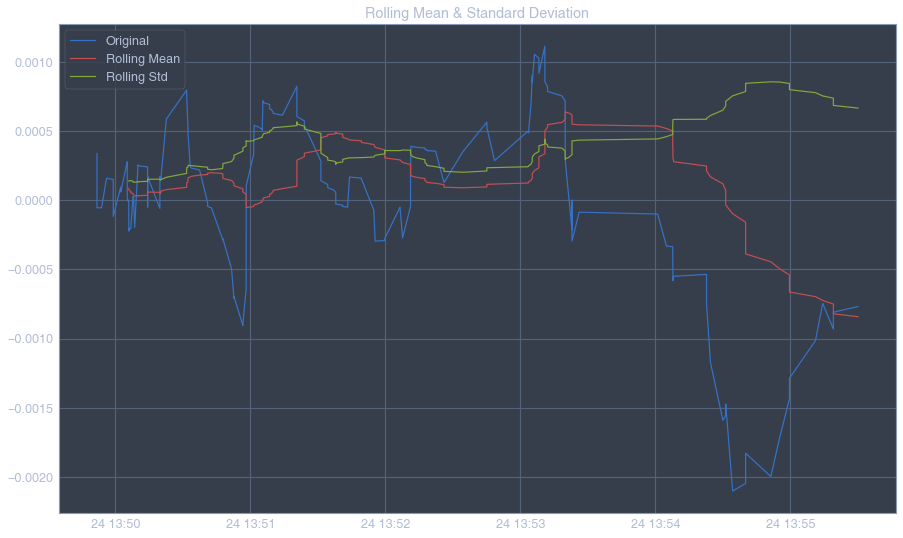

Results of Dickey-Fuller Test:
Test Statistic                                                         -2.493965
p-value                                                                  0.11695
#Lags Used                                                                   6.0
Number of Observations Used                                                293.0
Critical Value 1%                                                      -3.452867
Critical Value 5%                                                      -2.871455
Critical Value 10%                                                     -2.572053
RESULT:                        Failed to Reject Ho - Time Series is Non-Stati...
dtype: object


In [59]:
test_stationary(dataset_bk_log_scale_minus_mov_average[300:600])

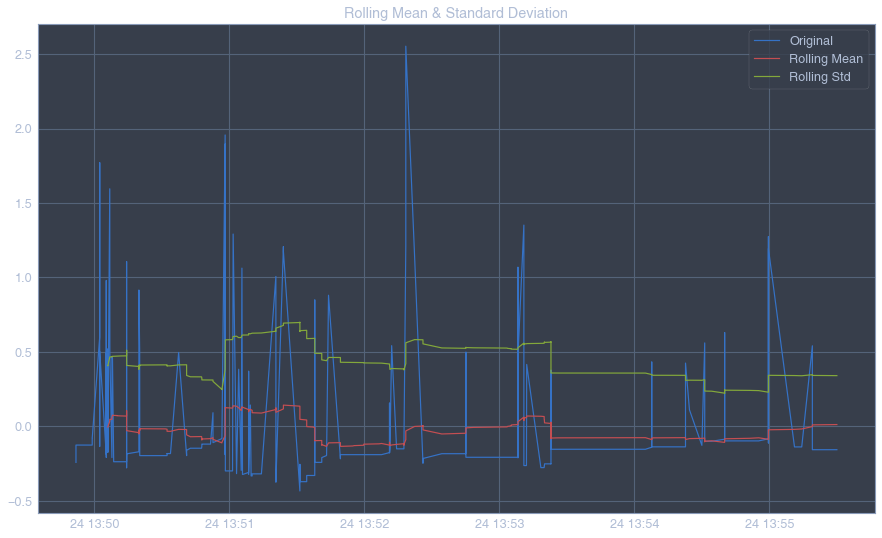

Results of Dickey-Fuller Test:
Test Statistic                                             -6.008726
p-value                                                          0.0
#Lags Used                                                       4.0
Number of Observations Used                                    295.0
Critical Value 1%                                          -3.452713
Critical Value 5%                                          -2.871388
Critical Value 10%                                         -2.572017
RESULT:                        Reject Ho - Time Series is Stationary
dtype: object


In [61]:
bk_log_scale_volume = np.log(bk_df['Volume'])
mov_average = bk_log_scale_volume.rolling(window=50).mean()
data = bk_log_scale_volume - mov_average
data.dropna(inplace=True)

test_stationary(data[300:600])